In [1]:
from protrend.utils import NeoDatabase, Settings

neo_db = NeoDatabase(user_name=Settings.db_user_name, password=Settings.db_password,
                     ip=Settings.db_ip, port=Settings.db_port)
neo_db.connect()

In [2]:
import pandas as pd

# organism out-degree distribution
organism_dfs = []
for label in ('Regulator', 'Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Organism)-[]-(r:{label}) return o.protrend_id, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Organism', 'Out-Degree (Kout)'])
    quantile = tmp['Out-Degree (Kout)'].quantile(0.95)
    tmp = tmp[tmp['Out-Degree (Kout)'] < quantile]
    tmp['label'] = label

    organism_dfs.append(tmp)

organism_degree = pd.concat(organism_dfs, ignore_index=True)
organism_degree

,Organism,Out-Degree (Kout),label
0,PRT.ORG.0000002,1,Regulator
1,PRT.ORG.0000003,1,Regulator
2,PRT.ORG.0000004,1,Regulator
3,PRT.ORG.0000005,18,Regulator
4,PRT.ORG.0000006,57,Regulator
...,...,...,...
1990,PRT.ORG.0000609,219,RegulatoryInteraction
1991,PRT.ORG.0000610,196,RegulatoryInteraction
1992,PRT.ORG.0000611,397,RegulatoryInteraction
1993,PRT.ORG.0000612,280,RegulatoryInteraction


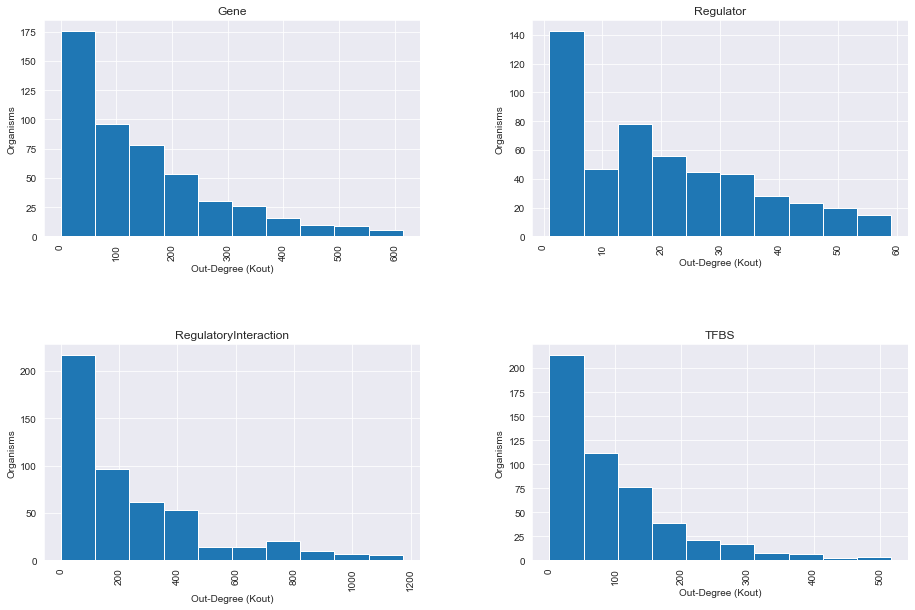

In [17]:
import matplotlib.pyplot as plt
hist = organism_degree[['Out-Degree (Kout)', 'label']].hist(by='label', bins=10, figsize=(15, 10))

for ax in hist.flatten():
    ax.set_xlabel("Out-Degree (Kout)")
    ax.set_ylabel("Organisms")

plt.savefig("organism_degree.png", bbox_inches="tight", dpi=150)
plt.show()

c:\users\bisbii\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


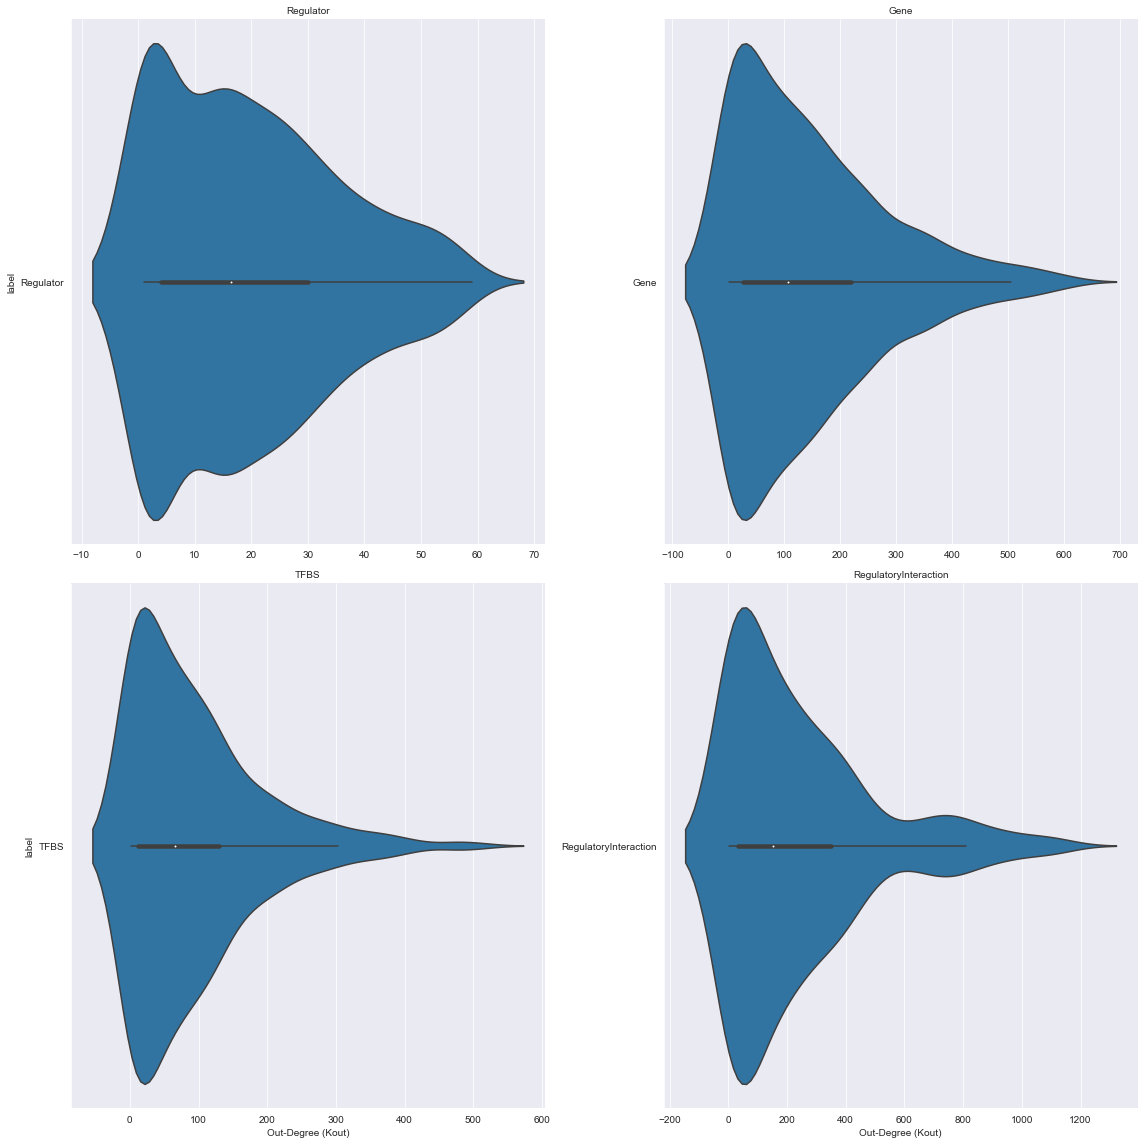

In [4]:
import seaborn as sns
g = sns.FacetGrid(organism_degree,
                  col="label",
                  col_wrap=2,
                  palette="Set3",
                  sharex=False,
                  sharey=False,
                  height=8)

g.map(sns.violinplot,
      "Out-Degree (Kout)",
      "label")

g.set_titles("{col_name}")

plt.savefig("organism_degree_violin.png", bbox_inches="tight", dpi=150)
plt.show()

In [8]:
import pandas as pd

# organism top out-degree distribution
top_dfs = []
for label in ('Regulator', 'Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Organism)-[]-(r:{label}) return o.protrend_id, o.name, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Organism ID', 'Organism Name', 'Out-Degree (Kout)'])
    tmp['label'] = label
    top_dfs.append(tmp)

top_degree = pd.concat(top_dfs, ignore_index=True)
top_degree = top_degree.set_index('Organism ID')
top_degree

,Organism Name,Out-Degree (Kout),label
Organism ID,,,
PRT.ORG.0000002,Acidobacterium capsulatum ATCC 51196,1,Regulator
PRT.ORG.0000003,Acinetobacter baumannii ATCC 17978,1,Regulator
PRT.ORG.0000004,Actinobacillus pleuropneumoniae serovar 5b str...,1,Regulator
PRT.ORG.0000005,Actinobacillus pleuropneumoniae serovar 7 str....,18,Regulator
PRT.ORG.0000006,Agrobacterium fabrum str. C58,57,Regulator
...,...,...,...
PRT.ORG.0000609,Idiomarina baltica OS145,219,RegulatoryInteraction
PRT.ORG.0000610,Glaciecola sp. HTCC2999,196,RegulatoryInteraction
PRT.ORG.0000611,Colwellia psychrerythraea 34H,397,RegulatoryInteraction


In [9]:
# get top 30 regulators
top_degree_regulators = top_degree[top_degree['label'] == 'Regulator'].sort_values(by='Out-Degree (Kout)', ascending=False).head(30)
top_degree_regulators

,Organism Name,Out-Degree (Kout),label
Organism ID,,,
PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,246,Regulator
PRT.ORG.0000035,Escherichia coli str. K-12 substr. MG1655,233,Regulator
PRT.ORG.0000028,Corynebacterium glutamicum ATCC 13032,178,Regulator
PRT.ORG.0000074,Pseudomonas aeruginosa PAO1,168,Regulator
PRT.ORG.0000060,Mycobacterium tuberculosis H37Rv,122,Regulator
PRT.ORG.0000170,Bacillus licheniformis DSM 13 = ATCC 14580,118,Regulator
PRT.ORG.0000010,Bacillus velezensis FZB42,108,Regulator
PRT.ORG.0000169,Bacillus pumilus SAFR-032,90,Regulator
PRT.ORG.0000540,Klebsiella pneumoniae subsp. pneumoniae MGH 78578,86,Regulator


In [10]:
# selecting rows for the top 30 regulators
top_degree_data = top_degree.loc[top_degree_regulators.index, :]
top_degree_data = top_degree_data.reset_index()
top_degree_data

,Organism ID,Organism Name,Out-Degree (Kout),label
0,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,246,Regulator
1,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,2231,Gene
2,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,2712,TFBS
3,PRT.ORG.0000012,Bacillus subtilis subsp. subtilis str. 168,11135,RegulatoryInteraction
4,PRT.ORG.0000035,Escherichia coli str. K-12 substr. MG1655,233,Regulator
...,...,...,...,...
115,PRT.ORG.0000162,Paenibacillus sp. JDR-2,879,RegulatoryInteraction
116,PRT.ORG.0000367,Shewanella sp. MR-7,59,Regulator
117,PRT.ORG.0000367,Shewanella sp. MR-7,757,Gene
118,PRT.ORG.0000367,Shewanella sp. MR-7,628,TFBS


c:\users\bisbii\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


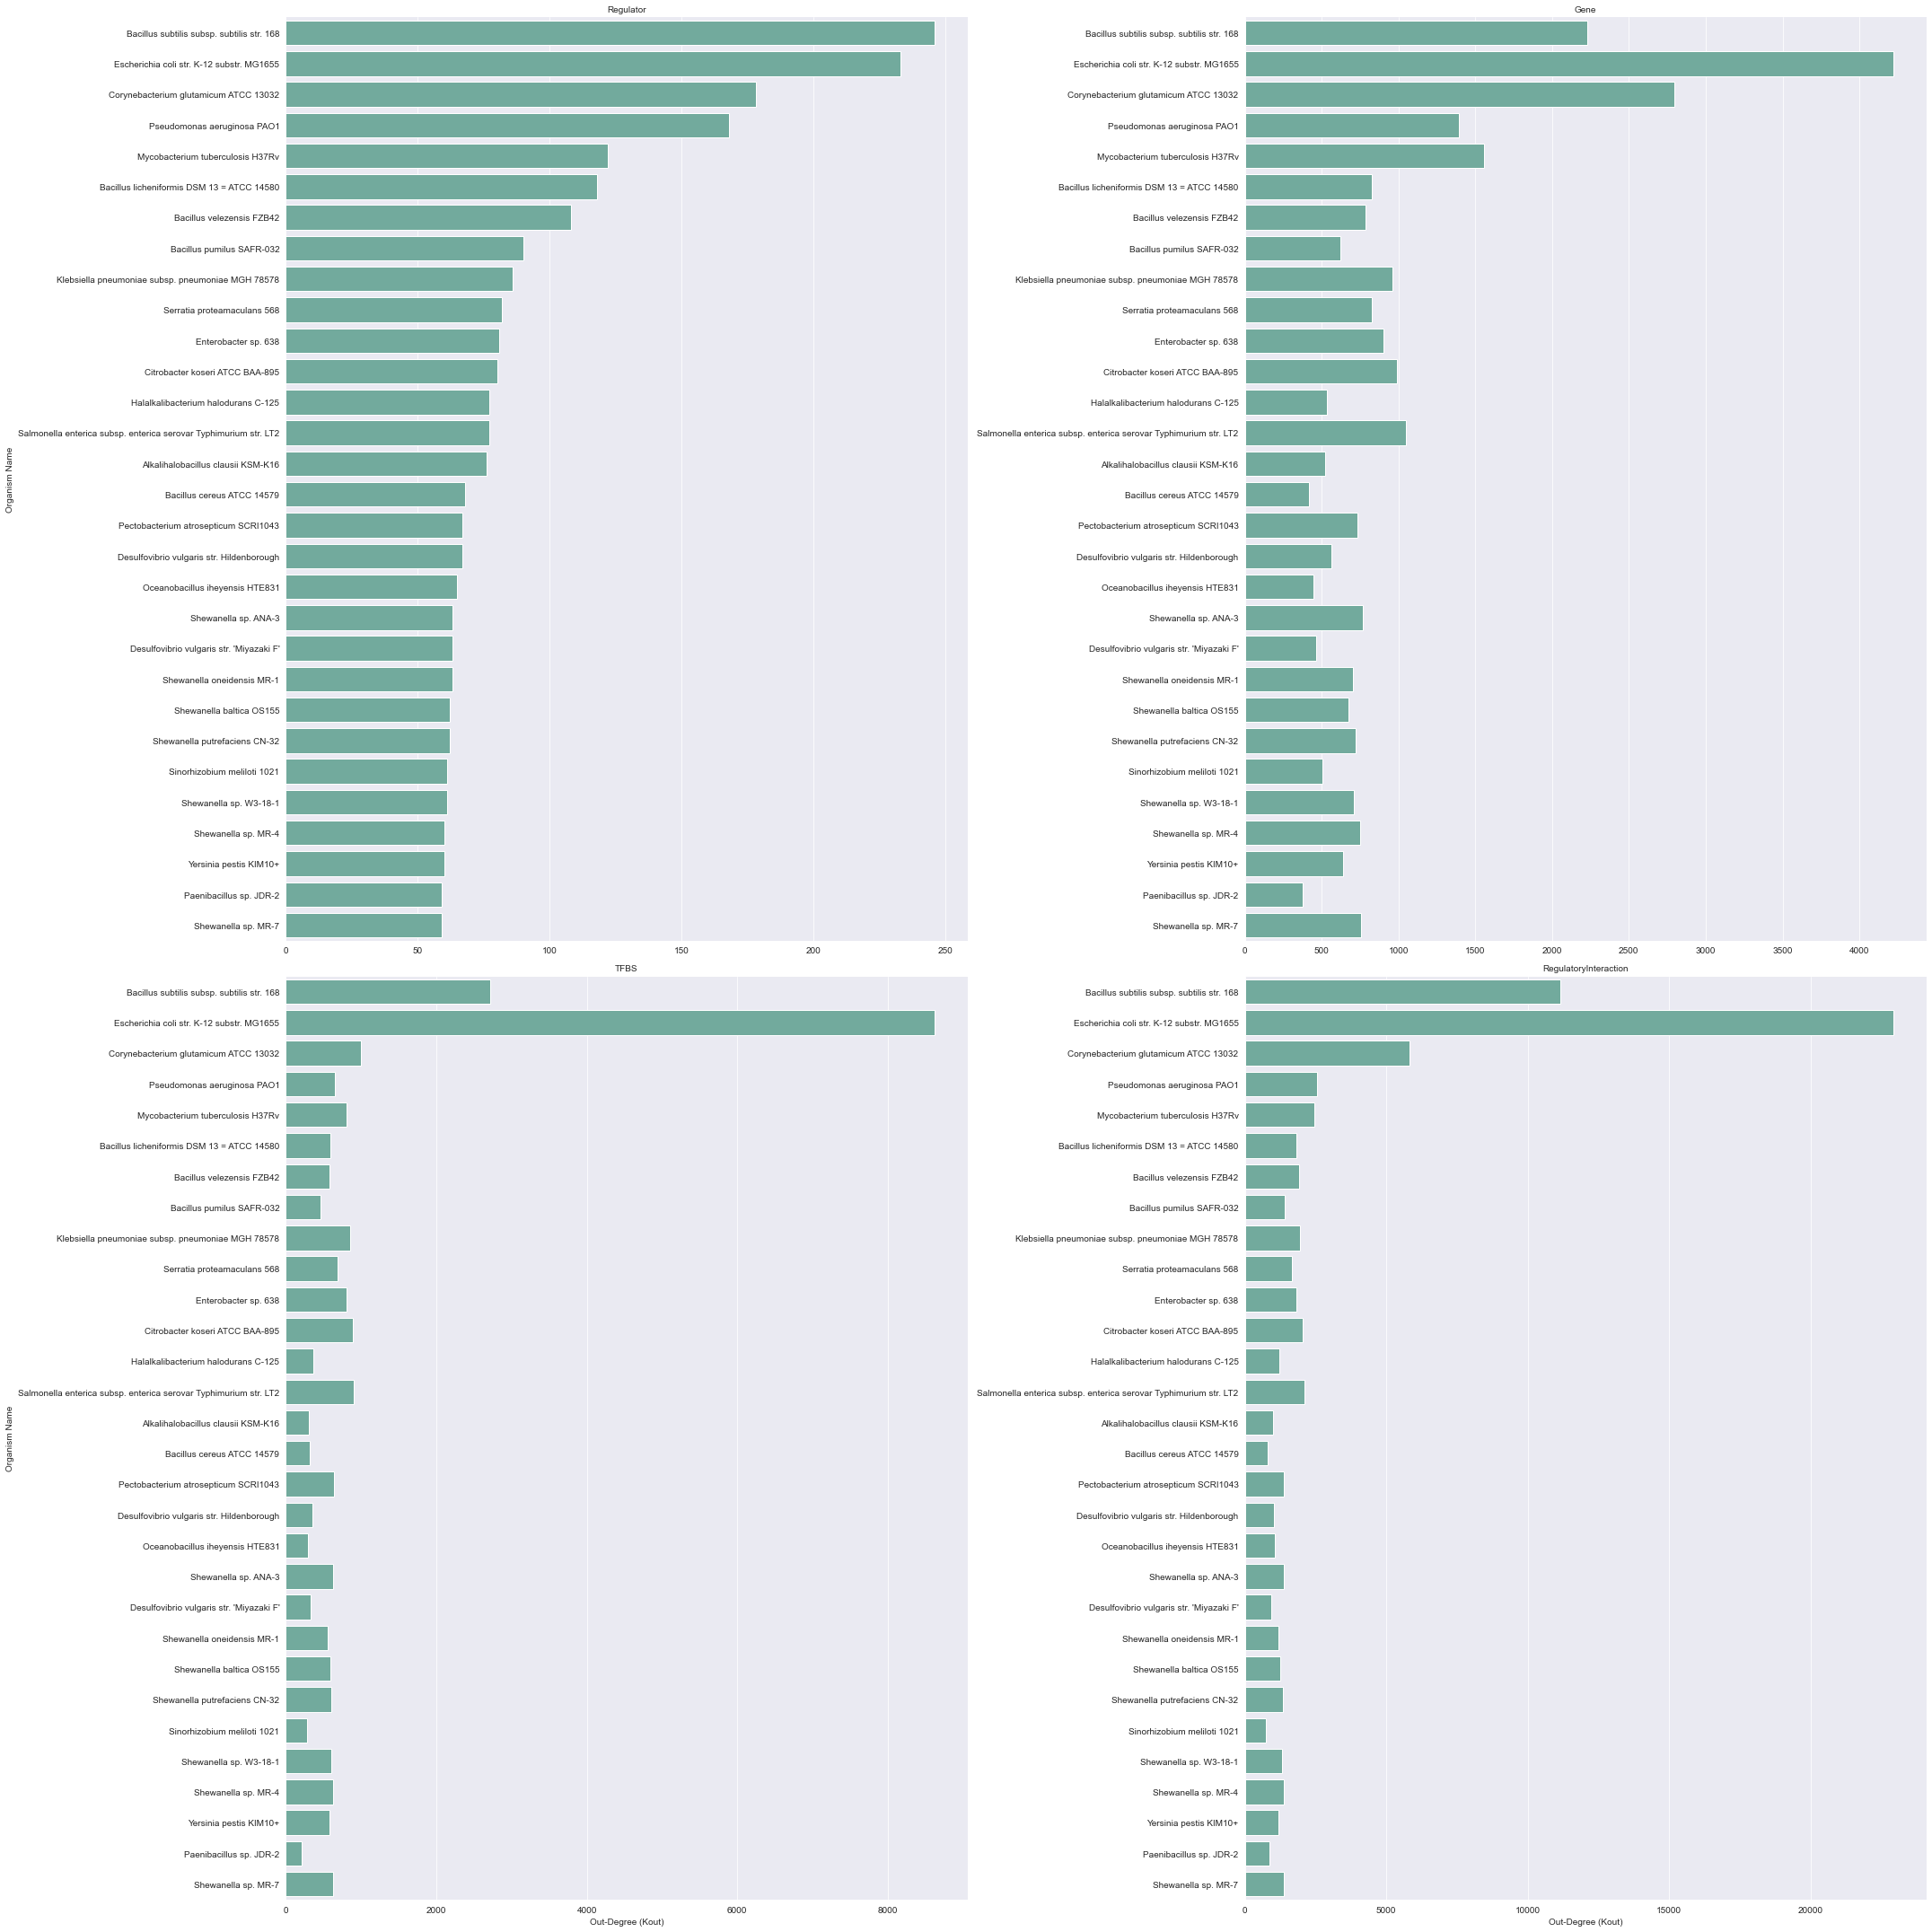

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(top_degree_data,
                  col="label",
                  col_wrap=2,
                  palette="Set3",
                  sharex=False,
                  sharey=False,
                  height=15)

g.map(sns.barplot,
      "Out-Degree (Kout)",
      "Organism Name",
      estimator=sum,
      ci=None,
      color='#69b3a2')

g.set_titles("{col_name}")

plt.savefig("organism_degree_top.png", bbox_inches="tight", dpi=150)
plt.show()

In [12]:
import pandas as pd

# regulator out-degree distribution
regulator_dfs = []
for label in ('Gene', 'TFBS', 'RegulatoryInteraction'):

    res = neo_db.db.cypher_query(f"match(o:Regulator)-[]-(r:{label}) return o.protrend_id, count(distinct(r.protrend_id))")

    tmp = pd.DataFrame(res[0], columns=['Regulator', 'Out-Degree (Kout)'])
    quantile = tmp['Out-Degree (Kout)'].quantile(0.95)
    tmp = tmp[tmp['Out-Degree (Kout)'] < quantile]
    tmp['label'] = label

    regulator_dfs.append(tmp)

regulator_degree = pd.concat(regulator_dfs, ignore_index=True)
regulator_degree

,Regulator,Out-Degree (Kout),label
0,PRT.REG.0000001,2,Gene
1,PRT.REG.0000002,1,Gene
2,PRT.REG.0000003,3,Gene
3,PRT.REG.0000004,1,Gene
4,PRT.REG.0000005,1,Gene
...,...,...,...
34633,PRT.REG.0012467,4,RegulatoryInteraction
34634,PRT.REG.0012468,1,RegulatoryInteraction
34635,PRT.REG.0012469,1,RegulatoryInteraction
34636,PRT.REG.0012470,3,RegulatoryInteraction


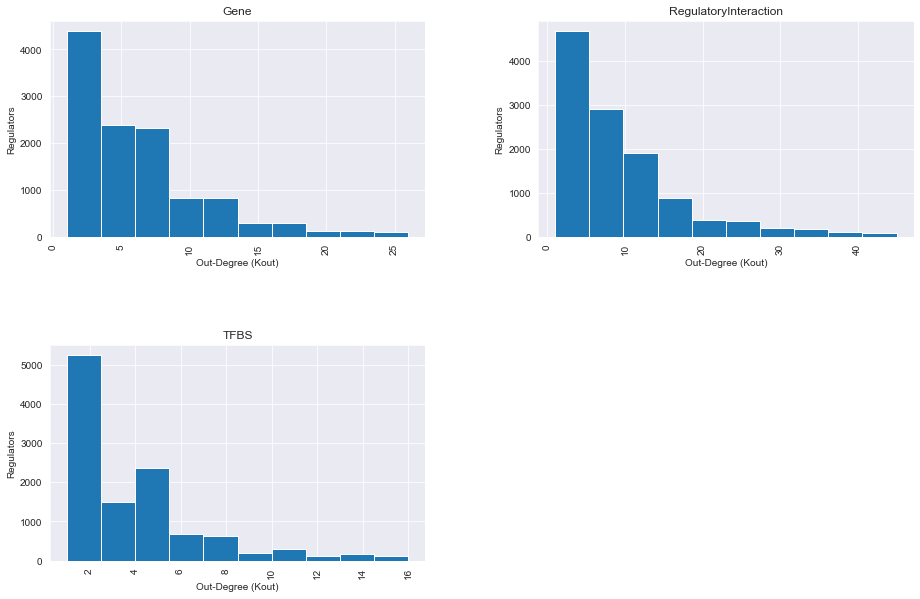

In [16]:
import matplotlib.pyplot as plt
hist = regulator_degree[['Out-Degree (Kout)', 'label']].hist(by='label', bins=10, figsize=(15, 10))

for ax in hist.flatten():
    ax.set_xlabel("Out-Degree (Kout)")
    ax.set_ylabel("Regulators")

plt.savefig("regulator_degree.png", bbox_inches="tight", dpi=150)
plt.show()

c:\users\bisbii\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


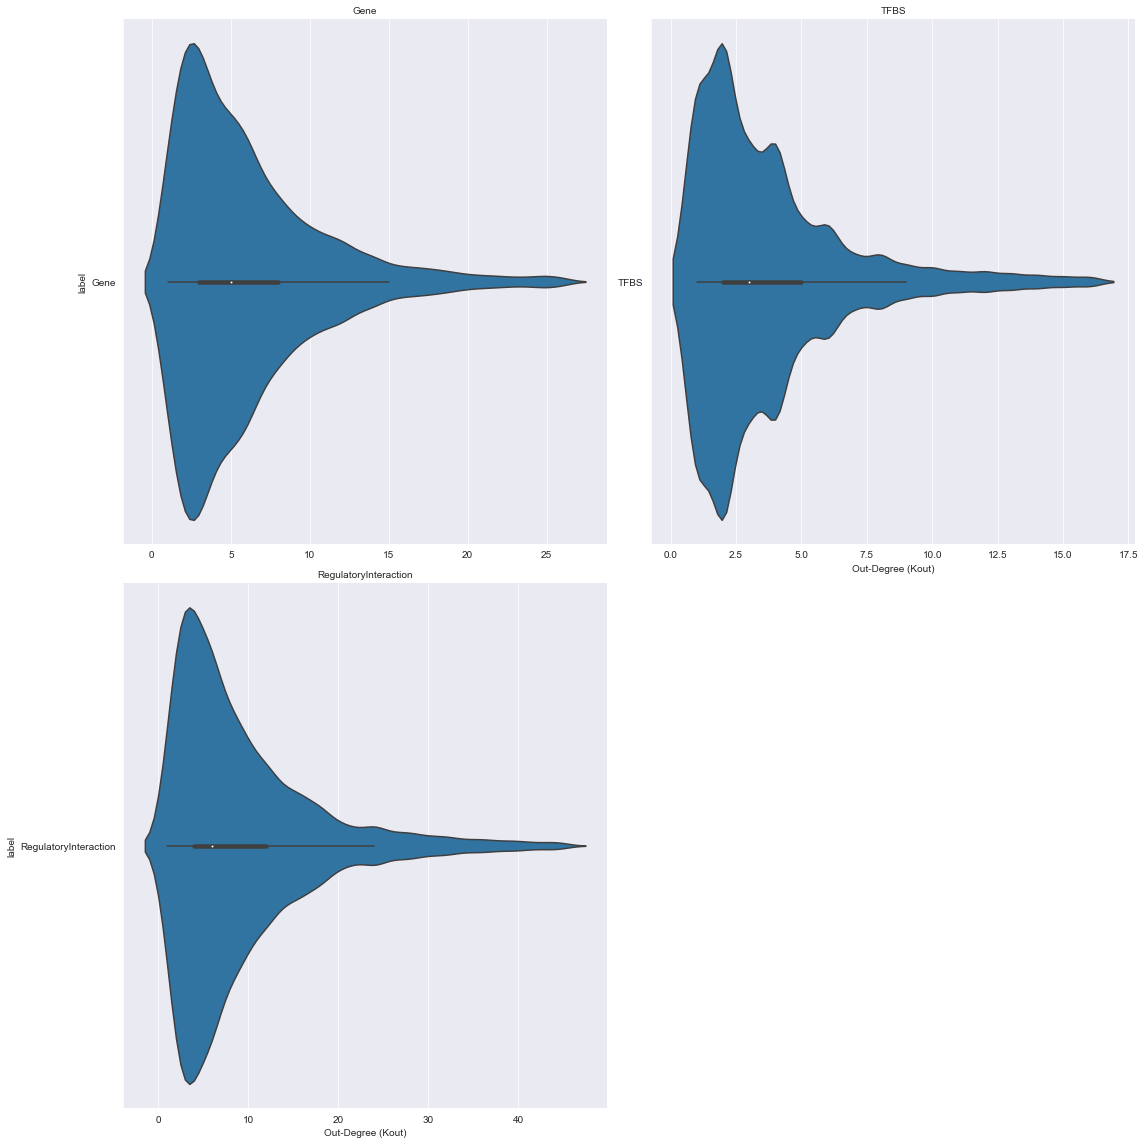

In [18]:
import seaborn as sns
g = sns.FacetGrid(regulator_degree,
                  col="label",
                  col_wrap=2,
                  palette="Set3",
                  sharex=False,
                  sharey=False,
                  height=8)

g.map(sns.violinplot,
      "Out-Degree (Kout)",
      "label")

g.set_titles("{col_name}")

plt.savefig("regulator_degree_violin.png", bbox_inches="tight", dpi=150)
plt.show()

In [19]:
from protrend.model import Regulator

# regulator mechanism table
regulators = Regulator.node_to_df()
mechanisms = regulators['mechanism'].value_counts()
mechanisms

transcription factor        11899
unknown                       372
sigma factor                   26
small rna (srna)                3
transcription terminator        1
Name: mechanism, dtype: int64